<a href="https://colab.research.google.com/github/erickuo5124/Opencvdl_hw/blob/hw1/cifar10_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

# Hyper Parameters
EPOCH = 20 
BATCH_SIZE = 50
LR = 0.0002

# CIFAR10 dataset
train_data = torchvision.datasets.CIFAR10(
  root='./CIFAR10/train',    # 保存或者提取位置
  train=True,  # this is training data
  transform=torchvision.transforms.ToTensor(),
  download=True,
)
# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [2]:
test_data = torchvision.datasets.CIFAR10(
  root='./CIFAR10/test', 
  train=False,
  transform=torchvision.transforms.ToTensor(),
  download=True,
)
test_loader = Data.DataLoader(dataset=test_data, batch_size=2000, shuffle=True)

Files already downloaded and verified


In [3]:
from torchsummary import summary

model = torchvision.models.vgg16()
model.cuda()
feature = torch.nn.Sequential(*list(model.children())[:])
print(feature)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
from torch.autograd import Variable

optimizer = torch.optim.Adam(model.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

record_accuracy = []
record_loss = []

# training and testing
for epoch in range(EPOCH):
  for step, (b_x, b_y) in enumerate(train_loader):   # 分配 batch data, normalize x when iterate train_loader
    optimizer.zero_grad()
    b_x,b_y = Variable(b_x).cuda(), Variable(b_y).cuda()
    output = model(b_x)
    loss = loss_func(output, b_y)
    loss.backward()
    optimizer.step()
    if step % 100 == 0:
      test_x, test_y=next(iter(test_loader))
      test_output = model(test_x.cuda())
      pred_y = torch.max(test_output, 1)[1].data.cpu().numpy().squeeze()
      accuracy = 0
      for pred, test in zip(pred_y, test_y.numpy()):
        if pred == test:
          accuracy += 1
      print(f'Epoch: {epoch}, Step: {step:03d}, Loss: {loss:.6f}, Accuracy: {accuracy/2000}')
      record_accuracy.append(accuracy/2000)
      record_loss.append(loss)
  print(f'========================================')


Epoch: 0, Step: 000, Loss: 6.911579, Accuracy: 0.106
Epoch: 0, Step: 100, Loss: 2.346477, Accuracy: 0.099
Epoch: 0, Step: 200, Loss: 2.352637, Accuracy: 0.1065
Epoch: 0, Step: 300, Loss: 2.276671, Accuracy: 0.145
Epoch: 0, Step: 400, Loss: 2.147631, Accuracy: 0.172
Epoch: 0, Step: 500, Loss: 1.953578, Accuracy: 0.2155
Epoch: 0, Step: 600, Loss: 1.921256, Accuracy: 0.219
Epoch: 0, Step: 700, Loss: 1.743552, Accuracy: 0.241
Epoch: 0, Step: 800, Loss: 1.949447, Accuracy: 0.2885
Epoch: 0, Step: 900, Loss: 1.868469, Accuracy: 0.314
Epoch: 1, Step: 000, Loss: 1.723301, Accuracy: 0.327
Epoch: 1, Step: 100, Loss: 1.451336, Accuracy: 0.3395
Epoch: 1, Step: 200, Loss: 1.536101, Accuracy: 0.3435
Epoch: 1, Step: 300, Loss: 1.514605, Accuracy: 0.387
Epoch: 1, Step: 400, Loss: 1.526178, Accuracy: 0.42
Epoch: 1, Step: 500, Loss: 1.341942, Accuracy: 0.479
Epoch: 1, Step: 600, Loss: 1.167057, Accuracy: 0.4875
Epoch: 1, Step: 700, Loss: 1.638077, Accuracy: 0.5065
Epoch: 1, Step: 800, Loss: 1.418062, Acc

In [6]:
torch.save(model.state_dict(), '/content/drive/MyDrive/NCKU/影像處理/Homework/Hw1/model')

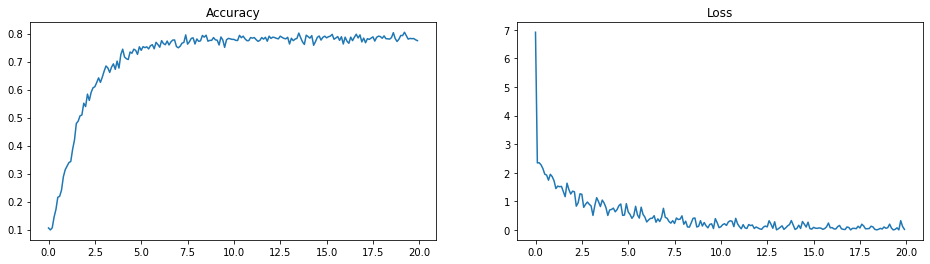

In [30]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array(range(EPOCH * 10))/10

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(y, record_accuracy)

plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(y, record_loss)

plt.show()

In [7]:
import torchvision
show_train_data = torchvision.datasets.CIFAR10(
  root='./CIFAR10/train',    # 保存或者提取位置
  train=False,  # this is training data
  download=True
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./CIFAR10/train/cifar-10-python.tar.gz to ./CIFAR10/train


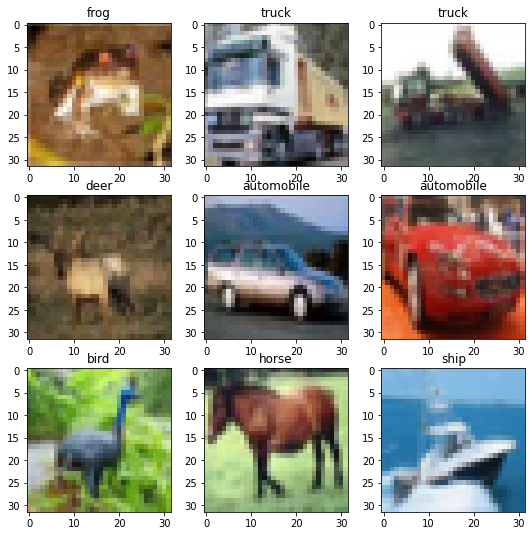

In [23]:
title = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(9, 9))
for i in range(9):
  plt.subplot(3, 3, i+1)
  title_idx = show_train_data[i][1]
  plt.title(title[title_idx])
  plt.imshow(show_train_data[i][0])